# Part 3 analysis
## todo:
- [ ] revise to plotly graphing library
- [x] rerun original results

## reference:
- https://www.pythonfordatascience.org/descriptive-statistics-python/

In [338]:
import pandas as pd
from colorama import Fore, Style, Back
import os
import seaborn as sns

import numpy as np
from scipy.stats import f_oneway, dunnett

In [339]:

data_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/results/english_clean_analysis_results.xlsx", sheet_name="Sheet1")
data_jats_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/results/english_jats_analysis_results.xlsx", sheet_name="Sheet1")
data_multi_lang_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/results/english_multi_lang_analysis_results.xlsx", sheet_name="Sheet1")
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
file_folder = "/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/tables/"

# Precision
look at precision values across all three datasets

In [340]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Precision']].agg(['mean','max','min','std'])
data_df_grouped

Precision  ...     
                                                        mean  ...  std
Query                                                         ...     
['How is RAG used to improve question answering...  0.400000  ...  0.0
['Tell me about Crossref.']                         1.000000  ...  0.0
['What are the key challenges and advancements ...  0.400000  ...  0.0
['What are the key challenges and advancements ...  0.000000  ...  0.0
['What are the key challenges and potential sol...  0.750000  ...  0.0
['What are the key features and limitations of ...  0.400000  ...  0.0
['What are the main challenges in normalizing c...  0.000000  ...  0.0
['What are the strengths and weaknesses of Web ...  0.400000  ...  0.0
['What is Crossref’s role in the scholarly rese...  1.000000  ...  0.0
['What methods are used to detect and correct e...  0.500000  ...  0.0
['Which papers address funding metadata, its av...  0.600000  ...  0.0
['Which papers discuss the use of Retrieval-Aug...  0.400000  ...  0.0
['Which papers evaluate the linguistic coverage...  0.333333  ...  0.0
['tell me about how RAG works.']                    0.200000  ...  0.0
['which studies examined citations?']               1.000000  ...  0.0
['which studies examined the abstract in metada...  0.200000  ...  0.0

[16 rows x 4 columns]

In [341]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_precision = data_df[['Query', 'Precision']]
data_jats_df_precision = data_jats_df[['Query','Precision']]
data_multi_lang_df_precision = data_multi_lang_df[['Query','Precision']]
print(len(data_df_precision))
print(len(data_jats_df_precision))
data_combined_precision = data_df_precision.join(data_jats_df_precision, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query_jats', inplace=True)
data_combined_precision = data_combined_precision.join(data_multi_lang_df_precision, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query', inplace=True)
data_combined_precision = data_combined_precision.rename(columns={'Query_data':'Query','Precision_data':'Precision_data','Precision_jats':'Precision_jats','Precision':'Precision_multi_lang'})

# save out
file_name = "data_combined_precision.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_precision.to_excel(save_location)

#ANOVA TEST
stat = f_oneway(data_combined_precision['Precision_data'],data_combined_precision['Precision_jats'],data_combined_precision['Precision_multi_lang'])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [data_combined_precision['Precision_jats'].to_list(),data_combined_precision['Precision_multi_lang'].to_list()]
control = data_combined_precision['Precision_data'].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"Dunnet Pvalues: {dunnet_result.pvalue}")

data_combined_precision




80
80
Pvalue: 0.883395667697117
Fvalue: 0.12404696547206458
the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet
Dunnet Pvalues: [0.83683465 0.96533688]


,Query,Precision_data,Precision_jats,Precision_multi_lang
0,['which studies examined the abstract in metad...,0.200000,0.200000,0.25
1,['which studies examined citations?'],1.000000,1.000000,1.00
2,['Tell me about Crossref.'],1.000000,1.000000,1.00
3,['Which papers evaluate the linguistic coverag...,0.333333,0.333333,0.50
4,"['Which papers address funding metadata, its a...",0.600000,0.600000,0.75
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.500000,0.500000,0.50
76,['tell me about how RAG works.'],0.200000,0.200000,0.25
77,['What are the key challenges and advancements...,0.000000,0.000000,0.00
78,['What are the key challenges and potential so...,0.750000,0.750000,0.75


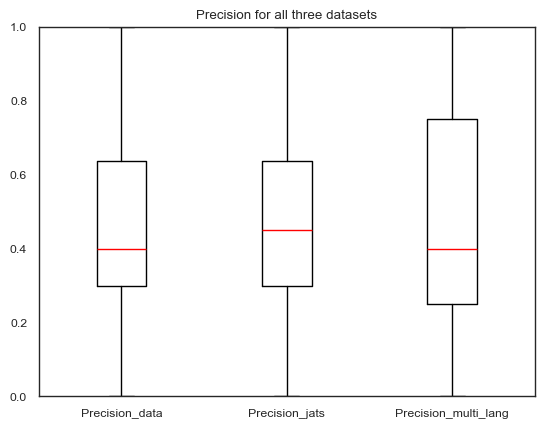

In [342]:
import matplotlib.pyplot as plt

data_combined_precision[['Precision_data','Precision_jats','Precision_multi_lang']].plot(kind='box',title='Precision for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [343]:
# get mean, max, min
data_combined_precision_grouped = pd.DataFrame(data_combined_precision.groupby(data_combined_precision['Query'])[['Precision_data', 'Precision_jats','Precision_multi_lang']].agg('mean'))

data_combined_precision_data_avg = data_combined_precision_grouped['Precision_data'].mean()
data_combined_precision_data_jats_avg = data_combined_precision_grouped['Precision_jats'].mean()
data_combined_precision_data_multi_lang_avg = data_combined_precision_grouped['Precision_multi_lang'].mean()
print(f"Precision_data column mean: {data_combined_precision_data_avg:.4f}")
print(f"Precision_jats column mean: {data_combined_precision_data_jats_avg:.4f}")
print(f"Precision_multi_lang column mean: {data_combined_precision_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Precision_data':data_combined_precision_data_avg,
    'Precision_jats':data_combined_precision_data_jats_avg,
    'Precision_multi_lang':data_combined_precision_data_multi_lang_avg
}
precision_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{precision_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_precision_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_precision_grouped.to_excel(save_location)

file_name = "precision_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
precision_grouped_means.to_excel(save_location)

data_combined_precision_grouped

Precision_data column mean: 0.4740
Precision_jats column mean: 0.4990
Precision_multi_lang column mean: 0.4850
   index  Precision_data  Precision_jats  Precision_multi_lang
0      0        0.473958        0.498958                 0.485


,Precision_data,Precision_jats,Precision_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.400000,0.600000,0.40
['Tell me about Crossref.'],1.000000,1.000000,1.00
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.400000,0.400000,0.40
['What are the key challenges and advancements in metadata quality assessment?'],0.000000,0.000000,0.00
['What are the key challenges and potential solutions for improving metadata quality?'],0.750000,0.750000,0.75
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.400000,0.400000,0.40
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.000000,0.000000,0.00
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.400000,0.400000,0.40
['What is Crossref’s role in the scholarly research ecosystem?'],1.000000,1.000000,1.00


# Recall scores

In [344]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Recall']].agg(['mean','max','min','std'])
data_df_grouped

Recall                 
                                                     mean   max   min  std
Query                                                                     
['How is RAG used to improve question answering...   0.40  0.40  0.40  0.0
['Tell me about Crossref.']                          0.40  0.40  0.40  0.0
['What are the key challenges and advancements ...   0.40  0.40  0.40  0.0
['What are the key challenges and advancements ...   0.00  0.00  0.00  0.0
['What are the key challenges and potential sol...   0.60  0.60  0.60  0.0
['What are the key features and limitations of ...   0.40  0.40  0.40  0.0
['What are the main challenges in normalizing c...   0.00  0.00  0.00  0.0
['What are the strengths and weaknesses of Web ...   0.40  0.40  0.40  0.0
['What is Crossref’s role in the scholarly rese...   0.40  0.40  0.40  0.0
['What methods are used to detect and correct e...   0.20  0.20  0.20  0.0
['Which papers address funding metadata, its av...   0.75  0.75  0.75  0.0
['Which papers discuss the use of Retrieval-Aug...   0.40  0.40  0.40  0.0
['Which papers evaluate the linguistic coverage...   0.20  0.20  0.20  0.0
['tell me about how RAG works.']                     0.20  0.20  0.20  0.0
['which studies examined citations?']                0.20  0.20  0.20  0.0
['which studies examined the abstract in metada...   0.20  0.20  0.20  0.0

In [345]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_recall = data_df[['Query', 'Recall']]
data_jats_df_recall = data_jats_df[['Query','Recall']]
data_multi_lang_df_recall = data_multi_lang_df[['Query','Recall']]
print(len(data_df_recall))
print(len(data_jats_df_recall))
data_combined_recall = data_df_recall.join(data_jats_df_recall, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query_jats', inplace=True)
data_combined_recall = data_combined_recall.join(data_multi_lang_df_recall, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query', inplace=True)
data_combined_recall = data_combined_recall.rename(columns={'Query_data':'Query','Recall_data':'Recall_data','Recall_jats':'Recall_jats','Recall':'Recall_multi_lang'})

#ANOVA TEST
stat = f_oneway(data_combined_recall['Recall_data'],data_combined_recall['Recall_jats'],data_combined_recall['Recall_multi_lang'])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [data_combined_recall['Recall_jats'].to_list(),data_combined_recall['Recall_multi_lang'].to_list()]
control = data_combined_recall['Recall_data'].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"Dunnet Pvalues: {dunnet_result.pvalue}")

data_combined_recall

80
80
Pvalue: 0.48288675758712585
Fvalue: 0.7302137492778739
the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet
Dunnet Pvalues: [0.64417345 0.89260115]


,Query,Recall_data,Recall_jats,Recall_multi_lang
0,['which studies examined the abstract in metad...,0.20,0.20,0.20
1,['which studies examined citations?'],0.20,0.20,0.20
2,['Tell me about Crossref.'],0.40,0.40,0.40
3,['Which papers evaluate the linguistic coverag...,0.20,0.20,0.20
4,"['Which papers address funding metadata, its a...",0.75,0.75,0.75
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.20,0.20,0.20
76,['tell me about how RAG works.'],0.20,0.20,0.20
77,['What are the key challenges and advancements...,0.00,0.00,0.00
78,['What are the key challenges and potential so...,0.60,0.60,0.60


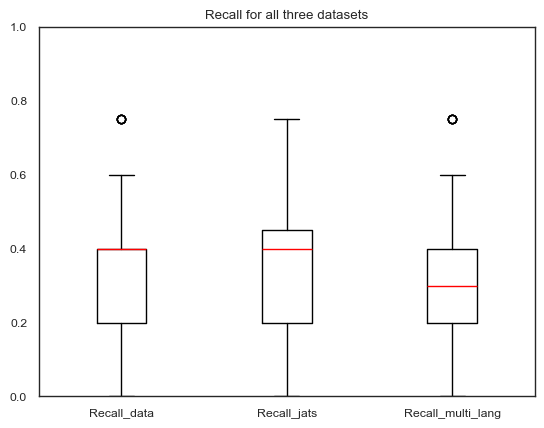

In [346]:
data_combined_recall[['Recall_data','Recall_jats','Recall_multi_lang']].plot(kind='box',title='Recall for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [347]:
# get mean, max, min
data_combined_recall_grouped = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('mean'))

data_combined_recall_data_avg = data_combined_recall_grouped['Recall_data'].mean()
data_combined_recall_data_jats_avg = data_combined_recall_grouped['Recall_jats'].mean()
data_combined_recall_data_multi_lang_avg = data_combined_recall_grouped['Recall_multi_lang'].mean()
print(f"Recall_data column mean: {data_combined_recall_data_avg:.4f}")
print(f"Recall_jats column mean: {data_combined_recall_data_jats_avg:.4f}")
print(f"Recall_multi_lang column mean: {data_combined_recall_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Recall_data':data_combined_recall_data_avg,
    'Recall_jats':data_combined_recall_data_jats_avg,
    'Recall_multi_lang':data_combined_recall_data_multi_lang_avg
}
recall_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{recall_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_recall_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_recall_grouped.to_excel(save_location)

file_name = "recall_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
recall_grouped_means.to_excel(save_location)
data_combined_recall_grouped

#data_combined_recall_median = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('median'))
#data_combined_recall_median

Recall_data column mean: 0.3219
Recall_jats column mean: 0.3469
Recall_multi_lang column mean: 0.3094
   index  Recall_data  Recall_jats  Recall_multi_lang
0      0     0.321875     0.346875           0.309375


,Recall_data,Recall_jats,Recall_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.40,0.60,0.40
['Tell me about Crossref.'],0.40,0.40,0.40
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.40,0.40,0.40
['What are the key challenges and advancements in metadata quality assessment?'],0.00,0.00,0.00
['What are the key challenges and potential solutions for improving metadata quality?'],0.60,0.60,0.60
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.40,0.40,0.40
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.00,0.00,0.00
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.40,0.40,0.40
['What is Crossref’s role in the scholarly research ecosystem?'],0.40,0.40,0.40


# F1 scores

In [348]:
# F1 scores
data_df_grouped = data_df.groupby(data_df['Query'])[['F1-Score']].agg(['mean','max','min','std'])
data_df_grouped

F1-Score  ...     
                                                        mean  ...  std
Query                                                         ...     
['How is RAG used to improve question answering...  0.400000  ...  0.0
['Tell me about Crossref.']                         0.571429  ...  0.0
['What are the key challenges and advancements ...  0.400000  ...  0.0
['What are the key challenges and advancements ...  0.000000  ...  0.0
['What are the key challenges and potential sol...  0.666667  ...  0.0
['What are the key features and limitations of ...  0.400000  ...  0.0
['What are the main challenges in normalizing c...  0.000000  ...  0.0
['What are the strengths and weaknesses of Web ...  0.400000  ...  0.0
['What is Crossref’s role in the scholarly rese...  0.571429  ...  0.0
['What methods are used to detect and correct e...  0.285714  ...  0.0
['Which papers address funding metadata, its av...  0.666667  ...  0.0
['Which papers discuss the use of Retrieval-Aug...  0.400000  ...  0.0
['Which papers evaluate the linguistic coverage...  0.250000  ...  0.0
['tell me about how RAG works.']                    0.200000  ...  0.0
['which studies examined citations?']               0.333333  ...  0.0
['which studies examined the abstract in metada...  0.200000  ...  0.0

[16 rows x 4 columns]

In [349]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_F1 = data_df[['Query', 'F1-Score']]
data_jats_df_F1 = data_jats_df[['Query','F1-Score']]
data_multi_lang_df_F1 = data_multi_lang_df[['Query','F1-Score']]
print(len(data_df_F1))
print(len(data_jats_df_F1))
data_combined_F1 = data_df_F1.join(data_jats_df_F1, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query_jats', inplace=True)
data_combined_F1 = data_combined_F1.join(data_multi_lang_df_F1, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query', inplace=True)
data_combined_F1 = data_combined_F1.rename(columns={'Query_data':'Query','F1-Score_data':'F1-Score_data','F1-Score_jats':'F1-Score_jats','F1-Score':'F1-Score_multi_lang'})

#ANOVA TEST
stat = f_oneway(data_combined_F1['F1-Score_data'],data_combined_F1['F1-Score_jats'],data_combined_F1['F1-Score_multi_lang'])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [data_combined_F1['F1-Score_jats'].to_list(),data_combined_F1['F1-Score_multi_lang'].to_list()]
control = data_combined_F1['F1-Score_data'].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"Dunnet Pvalues: {dunnet_result.pvalue}")


data_combined_F1

80
80
Pvalue: 0.6362513789066516
Fvalue: 0.45302530063334223
the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet
Dunnet Pvalues: [0.66056962 0.99206689]


,Query,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
0,['which studies examined the abstract in metad...,0.200000,0.200000,0.222222
1,['which studies examined citations?'],0.333333,0.333333,0.333333
2,['Tell me about Crossref.'],0.571429,0.571429,0.571429
3,['Which papers evaluate the linguistic coverag...,0.250000,0.250000,0.285714
4,"['Which papers address funding metadata, its a...",0.666667,0.666667,0.750000
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.285714,0.285714,0.285714
76,['tell me about how RAG works.'],0.200000,0.200000,0.222222
77,['What are the key challenges and advancements...,0.000000,0.000000,0.000000
78,['What are the key challenges and potential so...,0.666667,0.666667,0.666667


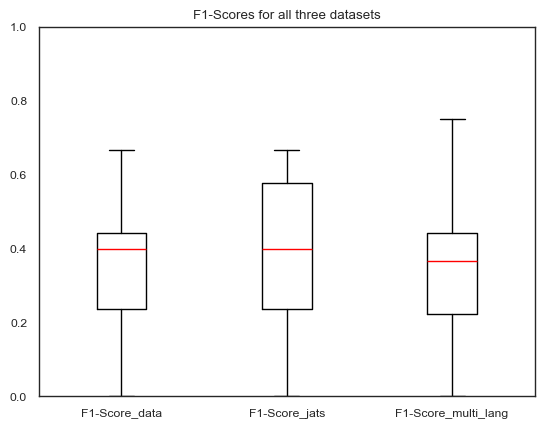

In [350]:
data_combined_F1[['F1-Score_data','F1-Score_jats','F1-Score_multi_lang']].plot(kind='box',title='F1-Scores for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [351]:
# get mean, max, min
data_combined_F1_grouped = pd.DataFrame(data_combined_F1.groupby(data_combined_F1['Query'])[['F1-Score_data', 'F1-Score_jats','F1-Score_multi_lang']].agg('mean'))

data_combined_F1_data_avg = data_combined_F1_grouped['F1-Score_data'].mean()
data_combined_F1_data_jats_avg = data_combined_F1_grouped['F1-Score_jats'].mean()
data_combined_F1_data_multi_lang_avg = data_combined_F1_grouped['F1-Score_multi_lang'].mean()
print(f"F1_data column mean: {data_combined_F1_data_avg:.4f}")
print(f"F1_jats column mean: {data_combined_F1_data_jats_avg:.4f}")
print(f"F1_multi_lang column mean: {data_combined_F1_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'F1-Score_data':data_combined_F1_data_avg,
    'F1-Score_jats':data_combined_F1_data_jats_avg,
    'F1-Score_multi_lang':data_combined_F1_data_multi_lang_avg
}
F1_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{F1_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_F1_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_F1_grouped.to_excel(save_location)

file_name = "F1_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
F1_grouped_means.to_excel(save_location)
data_combined_F1_grouped

F1_data column mean: 0.3591
F1_jats column mean: 0.3841
F1_multi_lang column mean: 0.3557
   index  F1-Score_data  F1-Score_jats  F1-Score_multi_lang
0      0       0.359077       0.384077             0.355685


,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.400000,0.600000,0.400000
['Tell me about Crossref.'],0.571429,0.571429,0.571429
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.400000,0.400000,0.400000
['What are the key challenges and advancements in metadata quality assessment?'],0.000000,0.000000,0.000000
['What are the key challenges and potential solutions for improving metadata quality?'],0.666667,0.666667,0.666667
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.400000,0.400000,0.400000
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.000000,0.000000,0.000000
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.400000,0.400000,0.400000
['What is Crossref’s role in the scholarly research ecosystem?'],0.571429,0.571429,0.571429


# Accuracy

In [352]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Accuracy  ...     
                                                        mean  ...  std
Query                                                         ...     
['How is RAG used to improve question answering...  0.937500  ...  0.0
['Tell me about Crossref.']                         0.968750  ...  0.0
['What are the key challenges and advancements ...  0.937500  ...  0.0
['What are the key challenges and advancements ...  0.906250  ...  0.0
['What are the key challenges and potential sol...  0.968750  ...  0.0
['What are the key features and limitations of ...  0.937500  ...  0.0
['What are the main challenges in normalizing c...  0.947917  ...  0.0
['What are the strengths and weaknesses of Web ...  0.937500  ...  0.0
['What is Crossref’s role in the scholarly rese...  0.968750  ...  0.0
['What methods are used to detect and correct e...  0.947917  ...  0.0
['Which papers address funding metadata, its av...  0.968750  ...  0.0
['Which papers discuss the use of Retrieval-Aug...  0.937500  ...  0.0
['Which papers evaluate the linguistic coverage...  0.937500  ...  0.0
['tell me about how RAG works.']                    0.916667  ...  0.0
['which studies examined citations?']               0.958333  ...  0.0
['which studies examined the abstract in metada...  0.916667  ...  0.0

[16 rows x 4 columns]

In [353]:
# combine all into one df and look at boxplot

data_df_accuracy = data_df[['Query', 'Accuracy']]
data_jats_df_accuracy = data_jats_df[['Query','Accuracy']]
data_multi_lang_df_accuracy = data_multi_lang_df[['Query','Accuracy']]
print(len(data_df_accuracy))
print(len(data_jats_df_accuracy))
data_combined_accuracy = data_df_accuracy.join(data_jats_df_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_accuracy = data_combined_accuracy.join(data_multi_lang_df_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query', inplace=True)
data_combined_accuracy = data_combined_accuracy.rename(columns={'Query_data':'Query','Accuracy_data':'Accuracy_data','Accuracy_jats':'Accuracy_jats','Accuracy':'Accuracy_multi_lang'})
data_combined_accuracy

80
80


,Query,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
0,['which studies examined the abstract in metad...,0.916667,0.916667,0.927083
1,['which studies examined citations?'],0.958333,0.958333,0.958333
2,['Tell me about Crossref.'],0.968750,0.968750,0.968750
3,['Which papers evaluate the linguistic coverag...,0.937500,0.937500,0.947917
4,"['Which papers address funding metadata, its a...",0.968750,0.968750,0.979167
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.947917,0.947917,0.947917
76,['tell me about how RAG works.'],0.916667,0.916667,0.927083
77,['What are the key challenges and advancements...,0.906250,0.906250,0.906250
78,['What are the key challenges and potential so...,0.968750,0.968750,0.968750


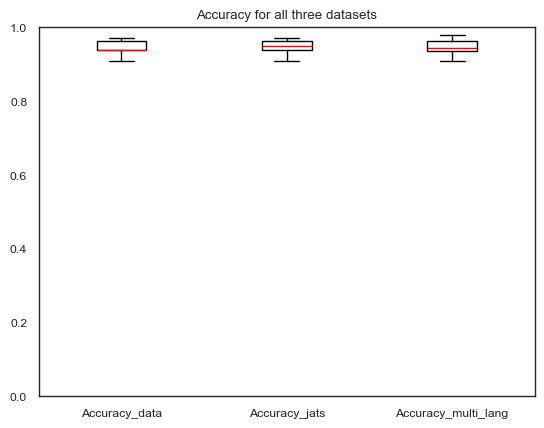

In [354]:
data_combined_accuracy[['Accuracy_data','Accuracy_jats','Accuracy_multi_lang']].plot(kind='box',title='Accuracy for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [355]:
# get mean, max, min
data_combined_accuracy_grouped = pd.DataFrame(data_combined_accuracy.groupby(data_combined_accuracy['Query'])[['Accuracy_data', 'Accuracy_jats','Accuracy_multi_lang']].agg('mean'))

data_combined_accuracy_data_avg = data_combined_accuracy_grouped['Accuracy_data'].mean()
data_combined_accuracy_data_jats_avg = data_combined_accuracy_grouped['Accuracy_jats'].mean()
data_combined_accuracy_data_multi_lang_avg = data_combined_accuracy_grouped['Accuracy_multi_lang'].mean()
print(f"accuracy_data column mean: {data_combined_accuracy_data_avg:.4f}")
print(f"accuracy_jats column mean: {data_combined_accuracy_data_jats_avg:.4f}")
print(f"accuracy_multi_lang column mean: {data_combined_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Accuracy_data':data_combined_accuracy_data_avg,
    'Accuracy_jats':data_combined_accuracy_data_jats_avg,
    'Accuracy_multi_lang':data_combined_accuracy_data_multi_lang_avg
}
accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{accuracy_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_accuracy_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_accuracy_grouped.to_excel(save_location)

file_name = "accuracy_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
accuracy_grouped_means.to_excel(save_location)
data_combined_accuracy_grouped

accuracy_data column mean: 0.9434
accuracy_jats column mean: 0.9460
accuracy_multi_lang column mean: 0.9441
   index  Accuracy_data  Accuracy_jats  Accuracy_multi_lang
0      0       0.943359       0.945964             0.944141


,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.937500,0.958333,0.937500
['Tell me about Crossref.'],0.968750,0.968750,0.968750
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.937500,0.937500,0.937500
['What are the key challenges and advancements in metadata quality assessment?'],0.906250,0.906250,0.906250
['What are the key challenges and potential solutions for improving metadata quality?'],0.968750,0.968750,0.968750
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.937500,0.937500,0.937500
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.947917,0.947917,0.947917
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.937500,0.937500,0.937500
['What is Crossref’s role in the scholarly research ecosystem?'],0.968750,0.968750,0.968750


# Balanced accuracy

In [356]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Balanced accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Balanced accuracy  ...     
                                                                mean  ...  std
Query                                                                 ...     
['How is RAG used to improve question answering...          0.683516  ...  0.0
['Tell me about Crossref.']                                 0.700000  ...  0.0
['What are the key challenges and advancements ...          0.683516  ...  0.0
['What are the key challenges and advancements ...          0.478022  ...  0.0
['What are the key challenges and potential sol...          0.794505  ...  0.0
['What are the key features and limitations of ...          0.683516  ...  0.0
['What are the main challenges in normalizing c...          0.500000  ...  0.0
['What are the strengths and weaknesses of Web ...          0.683516  ...  0.0
['What is Crossref’s role in the scholarly rese...          0.700000  ...  0.0
['What methods are used to detect and correct e...          0.594505  ...  0.0
['Which papers address funding metadata, its av...          0.864130  ...  0.0
['Which papers discuss the use of Retrieval-Aug...          0.683516  ...  0.0
['Which papers evaluate the linguistic coverage...          0.589011  ...  0.0
['tell me about how RAG works.']                            0.578022  ...  0.0
['which studies examined citations?']                       0.600000  ...  0.0
['which studies examined the abstract in metada...          0.578022  ...  0.0

[16 rows x 4 columns]

In [357]:
# combine into one df
data_df_bal_accuracy = data_df[['Query', 'Balanced accuracy']]
data_jats_df_bal_accuracy = data_jats_df[['Query','Balanced accuracy']]
data_multi_lang_df_bal_accuracy = data_multi_lang_df[['Query','Balanced accuracy']]
print(len(data_df_bal_accuracy))
print(len(data_jats_df_bal_accuracy))
data_combined_bal_accuracy = data_df_bal_accuracy.join(data_jats_df_bal_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.join(data_multi_lang_df_bal_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.rename(columns={'Query_data':'Query','Balanced accuracy_data':'Balanced accuracy_data','Balanced accuracy_jats':'Balanced accuracy_jats','Balanced accuracy':'Balanced accuracy_multi_lang'})

#ANOVA TEST
stat = f_oneway(data_combined_bal_accuracy['Balanced accuracy_data'],data_combined_bal_accuracy['Balanced accuracy_jats'],data_combined_bal_accuracy['Balanced accuracy_multi_lang'])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [data_combined_bal_accuracy['Balanced accuracy_jats'].to_list(),data_combined_bal_accuracy['Balanced accuracy_multi_lang'].to_list()]
control = data_combined_bal_accuracy['Balanced accuracy_data'].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"Dunnet Pvalues: {dunnet_result.pvalue}")


data_combined_bal_accuracy

80
80
Pvalue: 0.4876087336450615
Fvalue: 0.7204230475116864
the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet
Dunnet Pvalues: [0.62142624 0.91758897]


,Query,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
0,['which studies examined the abstract in metad...,0.578022,0.578022,0.583516
1,['which studies examined citations?'],0.600000,0.600000,0.600000
2,['Tell me about Crossref.'],0.700000,0.700000,0.700000
3,['Which papers evaluate the linguistic coverag...,0.589011,0.589011,0.594505
4,"['Which papers address funding metadata, its a...",0.864130,0.864130,0.869565
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.594505,0.594505,0.594505
76,['tell me about how RAG works.'],0.578022,0.578022,0.583516
77,['What are the key challenges and advancements...,0.478022,0.478022,0.478022
78,['What are the key challenges and potential so...,0.794505,0.794505,0.794505


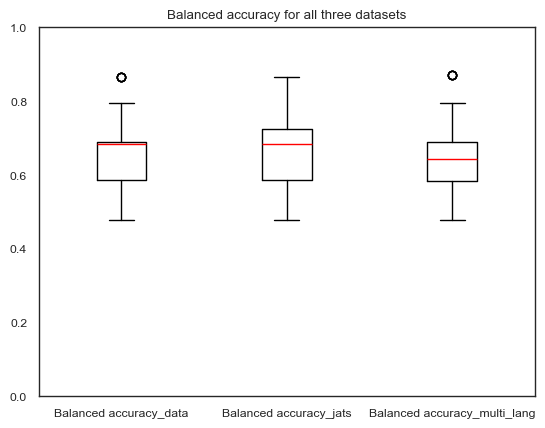

In [358]:
data_combined_bal_accuracy[['Balanced accuracy_data','Balanced accuracy_jats','Balanced accuracy_multi_lang']].plot(kind='box',title='Balanced accuracy for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [359]:
# get mean, max, min
data_combined_bal_accuracy_grouped = pd.DataFrame(data_combined_bal_accuracy.groupby(data_combined_bal_accuracy['Query'])[['Balanced accuracy_data', 'Balanced accuracy_jats','Balanced accuracy_multi_lang']].agg('mean'))

data_combined_bal_accuracy_data_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_data'].mean()
data_combined_bal_accuracy_data_jats_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_jats'].mean()
data_combined_bal_accuracy_data_multi_lang_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_multi_lang'].mean()
print(f"bal_accuracy_data column mean: {data_combined_bal_accuracy_data_avg:.4f}")
print(f"bal_accuracy_jats column mean: {data_combined_bal_accuracy_data_jats_avg:.4f}")
print(f"bal_accuracy_multi_lang column mean: {data_combined_bal_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Balanced accuracy_data':data_combined_bal_accuracy_data_avg,
    'Balanced accuracy_jats':data_combined_bal_accuracy_data_jats_avg,
    'Balanced accuracy_multi_lang':data_combined_bal_accuracy_data_multi_lang_avg
}
bal_accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{bal_accuracy_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_bal_accuracy_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_bal_accuracy_grouped.to_excel(save_location)

file_name = "bal_accuracy_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
bal_accuracy_grouped_means.to_excel(save_location)
data_combined_bal_accuracy_grouped

bal_accuracy_data column mean: 0.6496
bal_accuracy_jats column mean: 0.6628
bal_accuracy_multi_lang column mean: 0.6441
   index  ...  Balanced accuracy_multi_lang
0      0  ...                      0.644114

[1 rows x 4 columns]


,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.683516,0.789011,0.683516
['Tell me about Crossref.'],0.700000,0.700000,0.700000
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.683516,0.683516,0.683516
['What are the key challenges and advancements in metadata quality assessment?'],0.478022,0.478022,0.478022
['What are the key challenges and potential solutions for improving metadata quality?'],0.794505,0.794505,0.794505
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.683516,0.683516,0.683516
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.500000,0.500000,0.500000
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.683516,0.683516,0.683516
['What is Crossref’s role in the scholarly research ecosystem?'],0.700000,0.700000,0.700000


# Faithfulness score


In [360]:
#Faithfulness score
data_df_grouped = data_df.groupby(data_df['Query'])[['Faithfulness score']].agg(['mean','max','min','std'])
data_df_grouped

Faithfulness score  ...          
                                                                 mean  ...       std
Query                                                                  ...          
['How is RAG used to improve question answering...                5.0  ...  0.000000
['Tell me about Crossref.']                                       2.0  ...  0.000000
['What are the key challenges and advancements ...                5.0  ...  0.000000
['What are the key challenges and advancements ...                4.0  ...  0.000000
['What are the key challenges and potential sol...                2.8  ...  1.643168
['What are the key features and limitations of ...                5.0  ...  0.000000
['What are the main challenges in normalizing c...                0.0  ...  0.000000
['What are the strengths and weaknesses of Web ...                4.6  ...  0.894427
['What is Crossref’s role in the scholarly rese...                1.6  ...  0.547723
['What methods are used to detect and correct e...                2.0  ...  0.000000
['Which papers address funding metadata, its av...                4.2  ...  0.836660
['Which papers discuss the use of Retrieval-Aug...                4.8  ...  0.447214
['Which papers evaluate the linguistic coverage...                2.0  ...  0.000000
['tell me about how RAG works.']                                  5.0  ...  0.000000
['which studies examined citations?']                             1.0  ...  0.000000
['which studies examined the abstract in metada...                3.0  ...  0.000000

[16 rows x 4 columns]

In [361]:
# combine into one df
data_df_faithfulness = data_df[['Query', 'Faithfulness score']]
data_jats_df_faithfulness = data_jats_df[['Query','Faithfulness score']]
data_multi_lang_df_faithfulness = data_multi_lang_df[['Query','Faithfulness score']]
print(len(data_df_faithfulness))
print(len(data_jats_df_faithfulness))
data_combined_faithfulness = data_df_faithfulness.join(data_jats_df_faithfulness, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query_jats', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.join(data_multi_lang_df_faithfulness, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.rename(columns={'Query_data':'Query','Faithfulness score_data':'Faithfulness score_data','Faithfulness score_jats':'Faithfulness score_jats','Faithfulness score':'Faithfulness score_multi_lang'})

#ANOVA TEST
stat = f_oneway(data_combined_faithfulness['Faithfulness score_data'],data_combined_faithfulness['Faithfulness score_jats'],data_combined_faithfulness['Faithfulness score_multi_lang'])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [data_combined_faithfulness['Faithfulness score_jats'].to_list(),data_combined_faithfulness['Faithfulness score_multi_lang'].to_list()]
control = data_combined_faithfulness['Faithfulness score_data'].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"Dunnet: {dunnet_result}")


data_combined_faithfulness

80
80
Pvalue: 0.014432197724846291
Fvalue: 4.314999180969368
reject the null! the groups are statistically different. See the Dunnet results
Dunnet: Dunnett's test (95.0% Confidence Interval)
Comparison               Statistic  p-value  Lower CI  Upper CI
 (Sample 0 - Control)     -0.743     0.677    -0.799     0.399
 (Sample 1 - Control)     -2.833     0.010    -1.361    -0.164



,Query,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
0,['which studies examined the abstract in metad...,3,2,2
1,['which studies examined citations?'],1,1,1
2,['Tell me about Crossref.'],2,2,2
3,['Which papers evaluate the linguistic coverag...,2,2,2
4,"['Which papers address funding metadata, its a...",5,4,3
...,...,...,...,...
75,['What methods are used to detect and correct ...,2,2,2
76,['tell me about how RAG works.'],5,5,4
77,['What are the key challenges and advancements...,4,3,4
78,['What are the key challenges and potential so...,4,1,1


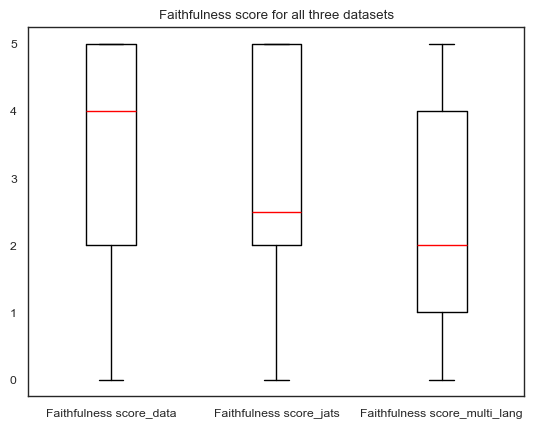

In [362]:
data_combined_faithfulness[['Faithfulness score_data','Faithfulness score_jats','Faithfulness score_multi_lang']].plot(kind='box',title='Faithfulness score for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
#plt.ylim(0, 5.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [363]:
# get mean, max, min
data_combined_faithfulness_grouped = pd.DataFrame(data_combined_faithfulness.groupby(data_combined_faithfulness['Query'])[['Faithfulness score_data', 'Faithfulness score_jats','Faithfulness score_multi_lang']].agg('mean'))

data_combined_faithfulness_data_avg = data_combined_faithfulness_grouped['Faithfulness score_data'].mean()
data_combined_faithfulness_data_jats_avg = data_combined_faithfulness_grouped['Faithfulness score_jats'].mean()
data_combined_faithfulness_data_multi_lang_avg = data_combined_faithfulness_grouped['Faithfulness score_multi_lang'].mean()
print(f"faithfulness_data column mean: {data_combined_faithfulness_data_avg:.4f}")
print(f"faithfulness_jats column mean: {data_combined_faithfulness_data_jats_avg:.4f}")
print(f"faithfulness_multi_lang column mean: {data_combined_faithfulness_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Faithfulness score_data':data_combined_faithfulness_data_avg,
    'Faithfulness score_jats':data_combined_faithfulness_data_jats_avg,
    'Faithfulness score_multi_lang':data_combined_faithfulness_data_multi_lang_avg
}
faithfulness_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{faithfulness_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_faithfulness_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_faithfulness_grouped.to_excel(save_location)

file_name = "faithfulness_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
faithfulness_grouped_means.to_excel(save_location)
data_combined_faithfulness_grouped

faithfulness_data column mean: 3.2500
faithfulness_jats column mean: 3.0500
faithfulness_multi_lang column mean: 2.4875
   index  ...  Faithfulness score_multi_lang
0      0  ...                         2.4875

[1 rows x 4 columns]


,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],5.0,5.0,5.0
['Tell me about Crossref.'],2.0,2.0,1.8
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],5.0,5.0,3.8
['What are the key challenges and advancements in metadata quality assessment?'],4.0,3.6,3.0
['What are the key challenges and potential solutions for improving metadata quality?'],2.8,2.2,2.2
['What are the key features and limitations of OpenAlex as a bibliometric database?'],5.0,4.4,5.0
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.0,0.0,0.0
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],4.6,4.2,1.8
['What is Crossref’s role in the scholarly research ecosystem?'],1.6,1.8,1.6


# Documents score
* NOTE 
There are two cells below - make sure you run the correct one for your data


## The following cell only works for documents score data from the v5 notebook
** only run this one for part_3_Cohere_RAG.ipynb results **

In [364]:
# special one for testing documents soore on Part_3_Cohere_RAG v5 notebook
#test_data = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx")

#test_data_doc_score = pd.DataFrame(test_data['Documents score'])
#test_data_doc_score

#data_documents_score_df = pd.DataFrame(test_data['Documents score'])
#data_jats_documents_score_df = pd.DataFrame(test_data['Documents score'])
#data_multi_lang_documents_score_df = pd.DataFrame(test_data['Documents score'])

#print(test_data_doc_score.iloc[0,0].strip('[]'))
#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x))
#******** THE ABOVE SECTION WAS FOR DEBUGGING **************

# Documents score
from ast import literal_eval
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])

# Strip off brackets
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))

#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

SyntaxError: invalid syntax (<unknown>, line 0)

## The following cell is for the Part_3_V6_Cohere_RAG.ipynb
** skip if you ran the cell above **

In [365]:
# Documents score
from ast import literal_eval
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])
#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded['Score'] = data_documents_exploded['Score'].fillna(0)

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded['Score'] = data_jats_documents_exploded['Score'].fillna(0)

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded['Score'] = data_multi_lang_documents_exploded['Score'].fillna(0)

print(len(data_documents_exploded))
print(len(data_jats_documents_exploded))
print(len(data_multi_lang_documents_exploded))
truncated_data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[0:279]
print(len(truncated_data_multi_lang_documents_exploded))

#ANOVA TEST
stat = f_oneway(data_documents_exploded['Score'][0:279],truncated_data_multi_lang_documents_exploded['Score'],data_jats_documents_exploded['Score'][0:279])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [data_jats_documents_exploded['Score'][0:279].to_list(),truncated_data_multi_lang_documents_exploded['Score'].to_list()]
control = data_documents_exploded['Score'][0:279].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"{dunnet_result}")


295
length of jats: 295
length of multi_lang: 279
295
295
279
279
Pvalue: 0.49987091836493436
Fvalue: 0.6939822088532196
the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet
Dunnett's test (95.0% Confidence Interval)
Comparison               Statistic  p-value  Lower CI  Upper CI
 (Sample 0 - Control)     -0.636     0.749    -0.070     0.039
 (Sample 1 - Control)     -1.177     0.393    -0.083     0.025



In [366]:
# create a df with all mean scores for each DOI
data_documents_score_grouped = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI'])['Score'].agg(['mean']))
data_documents_score_grouped = data_documents_score_grouped.sort_values('mean',ascending=False)
data_documents_score_grouped

data_jats_documents_score_grouped = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI'])['Score'].agg(['mean']))
data_jats_documents_score_grouped

data_multi_lang_documents_score_grouped = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI'])['Score'].agg(['mean']))
data_multi_lang_documents_score_grouped
# reset index so that DOI is a proper column
data_documents_score_grouped.reset_index(inplace=True,drop=False)
data_jats_documents_score_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_grouped.reset_index(inplace=True,drop=False)


data_documents_score_grouped_together = data_documents_score_grouped.merge(data_jats_documents_score_grouped,left_on='DOI',right_on='DOI',how="inner")
data_documents_score_grouped_together = data_documents_score_grouped_together.merge(data_multi_lang_documents_score_grouped, left_on='DOI', right_on='DOI',how="inner")
data_documents_score_grouped_together.rename(inplace=True, columns={'DOI':'DOI',
                                                                    'mean_x':'data_mean',
                                                                    'mean_y':'jats_mean',
                                                                    'mean':'multi_lang_mean'})

# save out
file_name = "data_documents_score_grouped_together.xlsx"
save_location = f"{file_folder}{file_name}"
data_documents_score_grouped_together.to_excel(save_location)


data_documents_score_grouped_together

,DOI,data_mean,jats_mean,multi_lang_mean
0,10.48550/arXiv.2409.10633,0.999951,0.999928,0.999279
1,10.6109/jkiice.2023.27.12.1489,0.998427,0.998190,0.972077
2,10.1145/3637528.3671470,0.996148,0.989592,0.967410
3,10.1007/s11192-015-1765-5,0.994089,0.993637,0.995549
4,10.1162/qss_a_00210,0.993015,0.993150,0.984694
5,10.48550/arXiv.2401.16359,0.983660,0.986572,0.993281
6,10.48550/arXiv.2404.17663,0.968564,0.943282,0.977684
7,10.1162/qss_a_00022,0.962892,0.950280,0.972119
8,10.1016/j.caeai.2025.100417,0.917179,0.904562,0.999839
9,10.18653/v1/2024.eacl-demo.16,0.899558,0.887031,0.966560


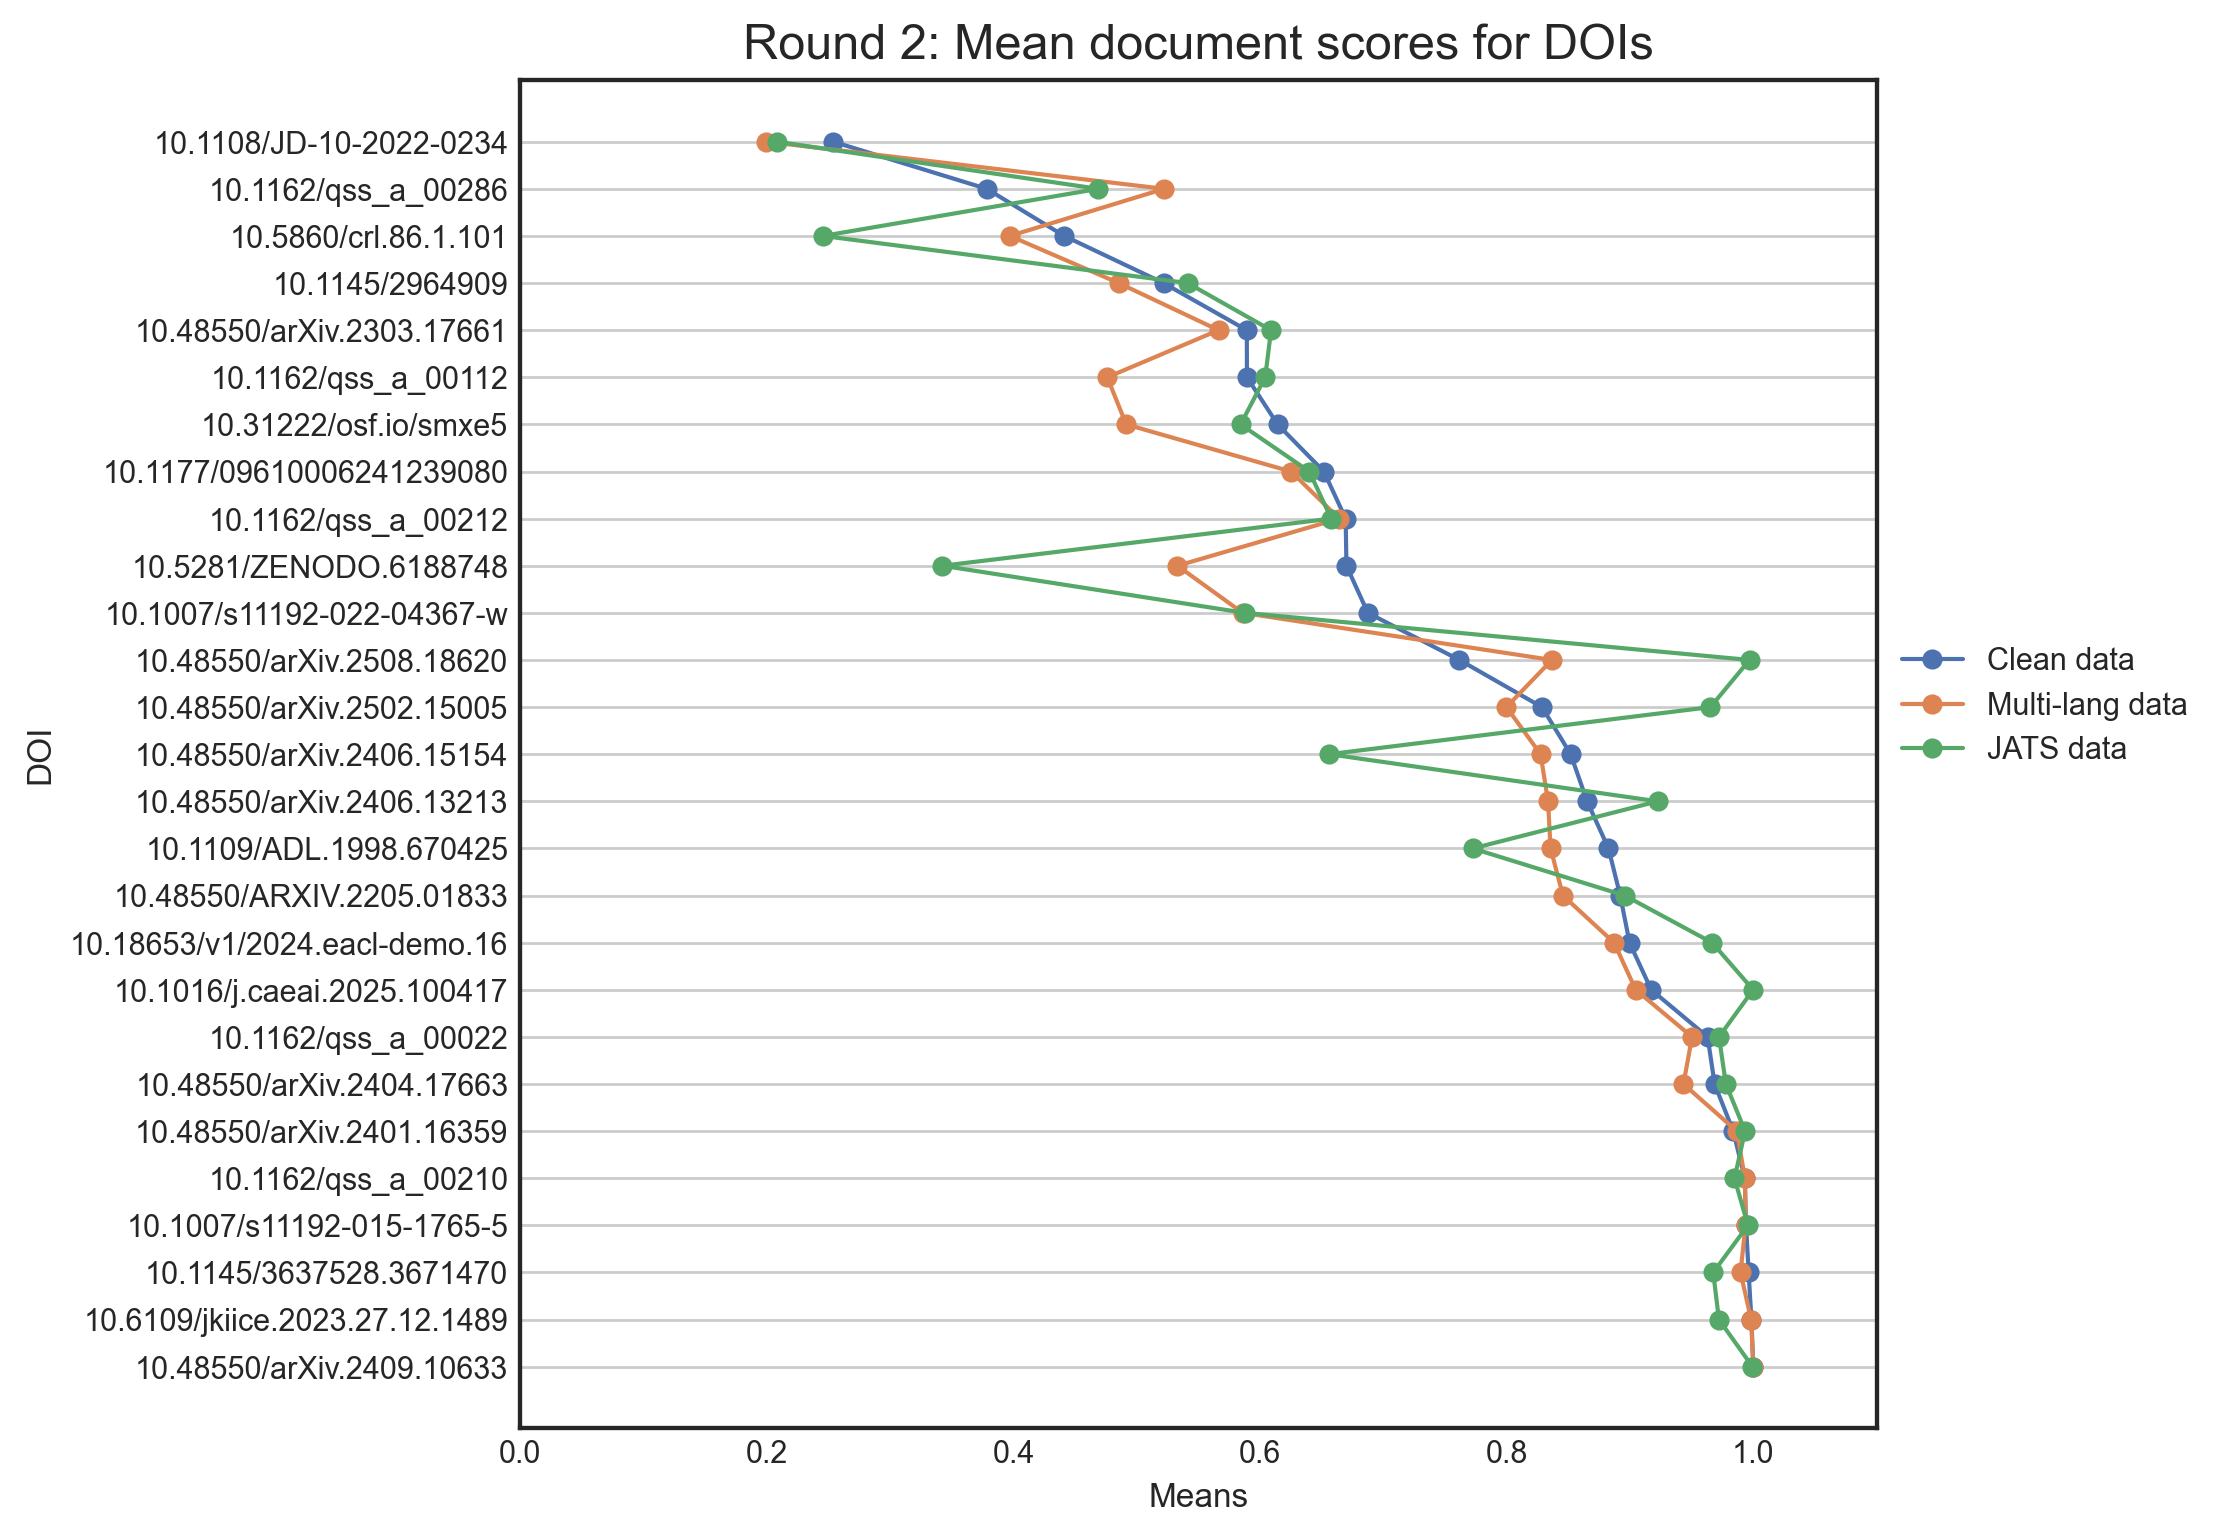

In [377]:


# Increase space between y-axis text
ax.tick_params(axis='y', pad=10, labelsize=12)  # Adjust the pad value as needed
plt.figure(figsize=(7,7), dpi=250)
plt.style.use('seaborn-v0_8-white') # Or 'ggplot', 'fivethirtyeight', etc.

plt.title("Round 1: Mean document scores for DOIs",fontdict={'size':14})

g = plt.plot(data_documents_score_grouped_together[['data_mean','jats_mean','multi_lang_mean']],
        data_documents_score_grouped_together['DOI'],
        marker='o',
        linestyle='-',data=data_documents_score_grouped_together)
ax = plt.gca()
plt.title("Round 2: Mean document scores for DOIs",fontdict={'size':14})
plt.xlabel('Means')
plt.ylabel('DOI')

ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='upper right')
plt.grid(visible=True,axis='y')

ax.legend(('Clean data', 'Multi-lang data', 'JATS data'), loc='upper right', bbox_to_anchor=(1.25,0.6))

plt.xlim(0, 1.1) # for scaled versions
plt.show()

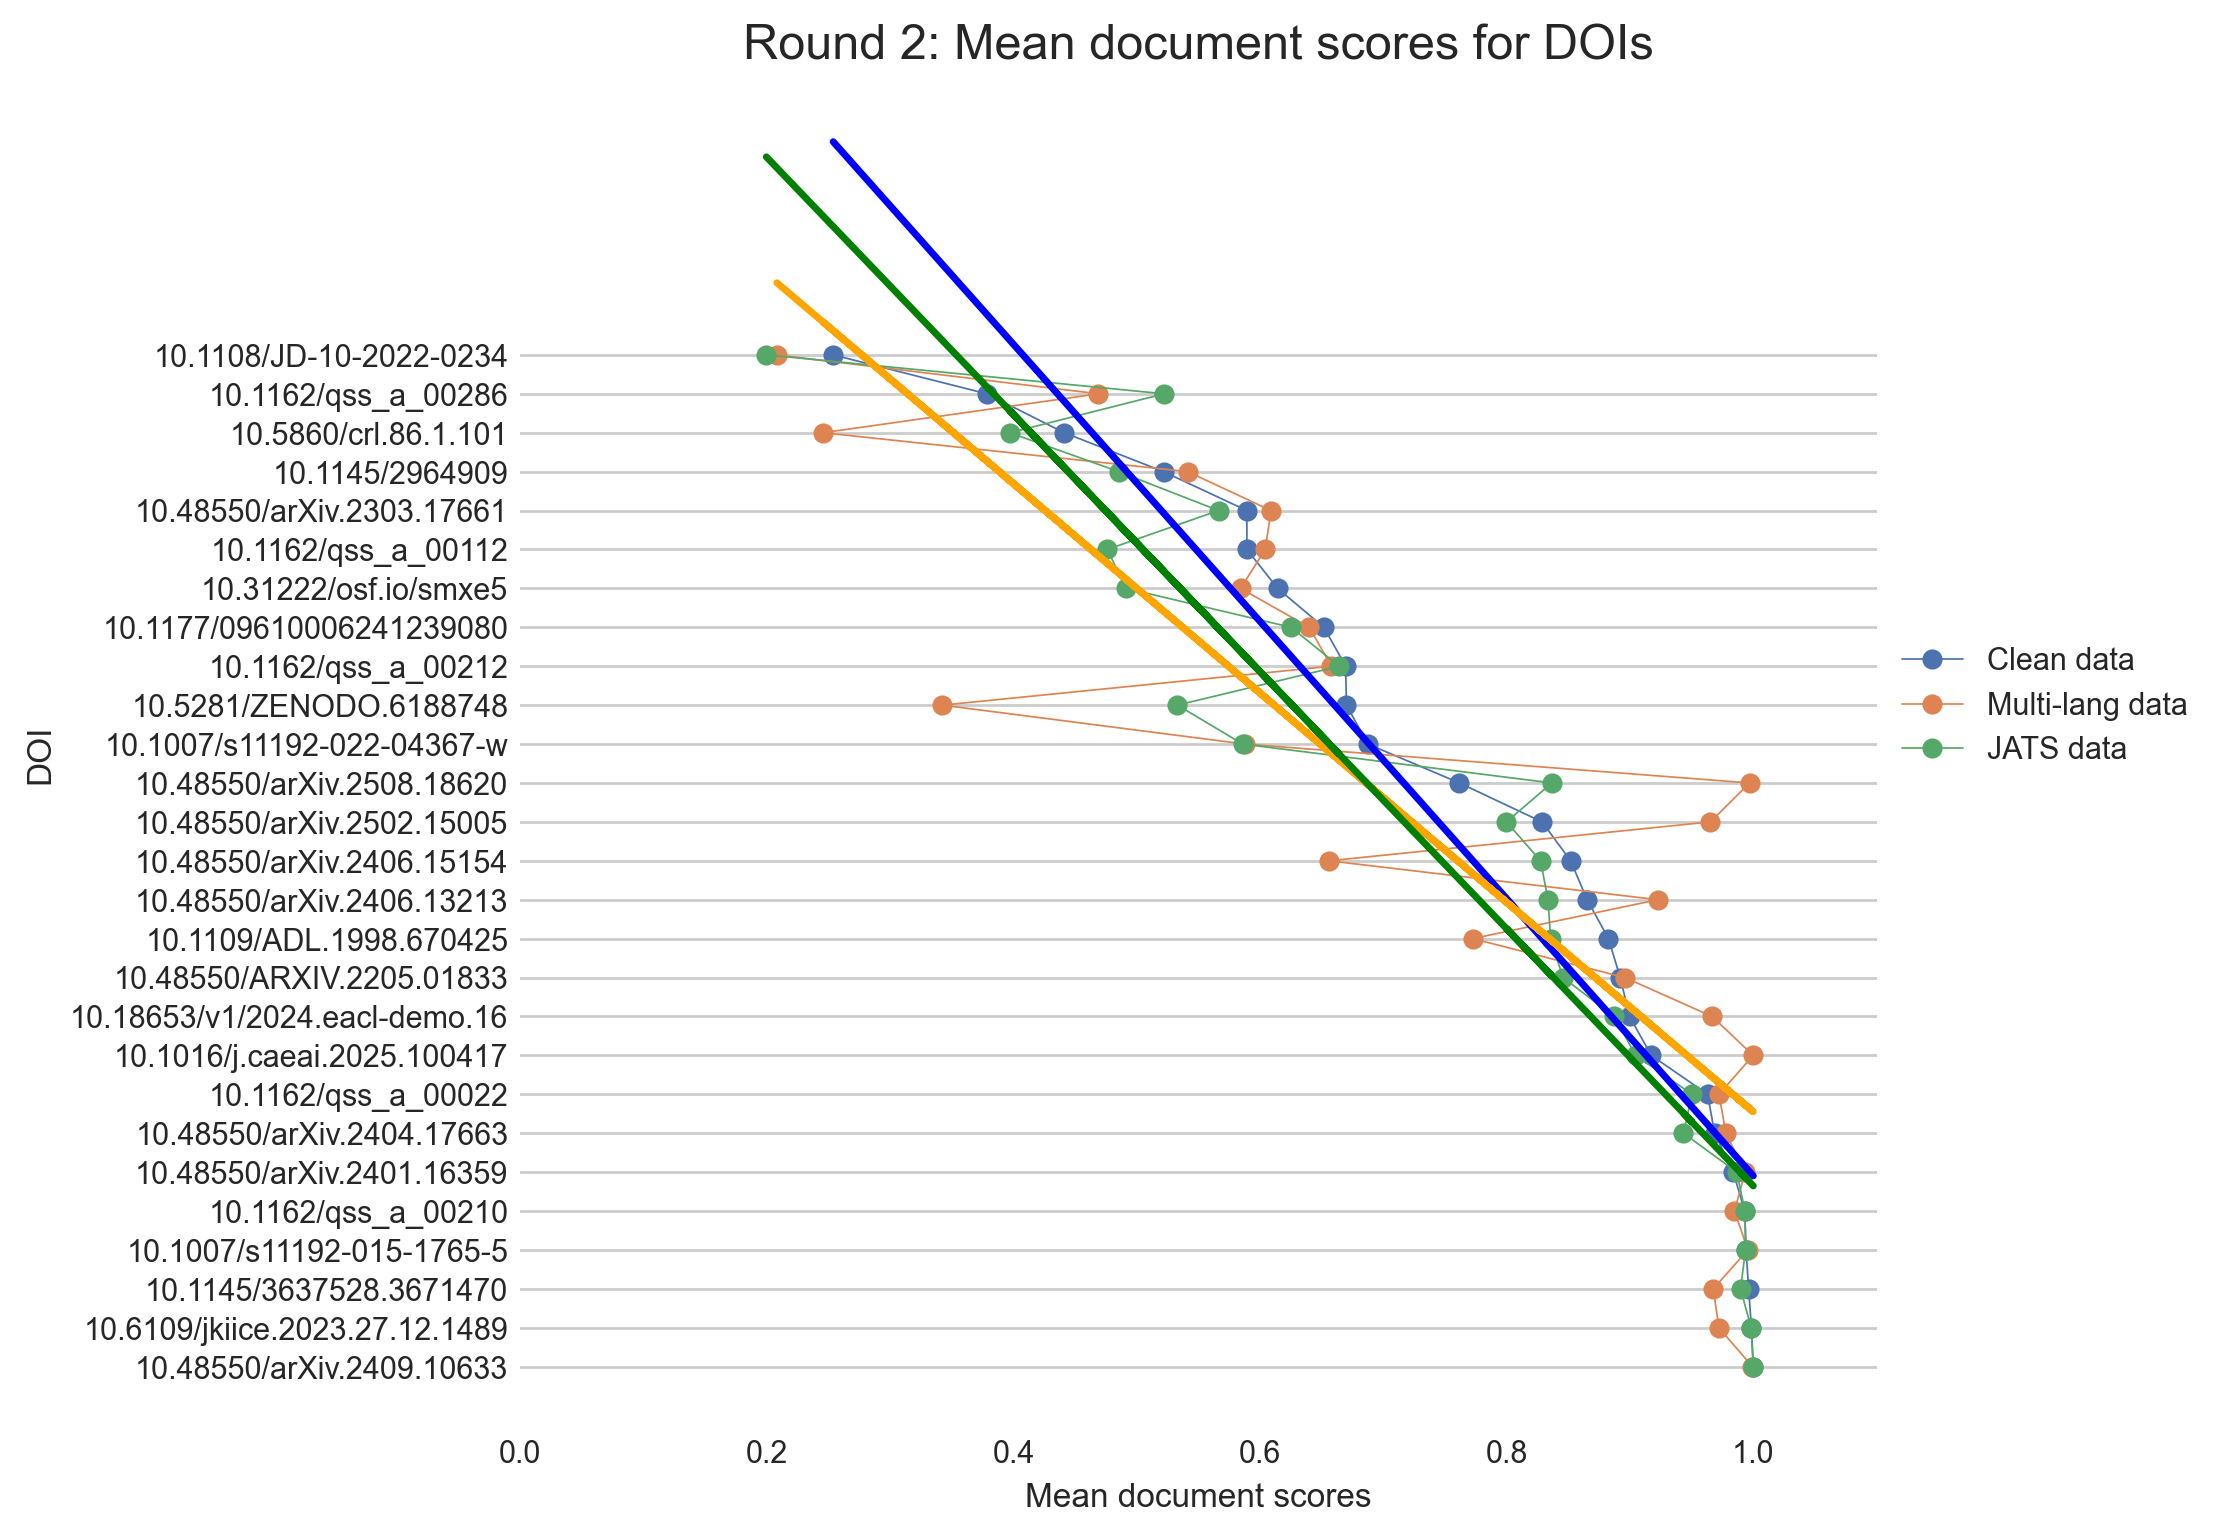

In [379]:
import matplotlib.pyplot as plt

data_documents_score_grouped_together['index'] = data_documents_score_grouped_together.index
#create linear regression
x = data_documents_score_grouped_together['data_mean']
y = data_documents_score_grouped_together['index']

x2 = data_documents_score_grouped_together['multi_lang_mean']

x3 = data_documents_score_grouped_together['jats_mean']

m,b= np.polyfit(x,y,1)

m2,b2 = np.polyfit(x2,y,1)

m3,b3 = np.polyfit(x3,y,1)

# Increase space between y-axis text
ax.tick_params(axis='y', pad=10, labelsize=12)  # Adjust the pad value as needed
plt.figure(figsize=(7,7), dpi=250)
plt.style.use('seaborn-v0_8-white') # Or 'ggplot', 'fivethirtyeight', etc.

plt.title("Round 2: Mean document scores for DOIs",fontdict={'size':14})

plt.grid(visible=True,axis='y')

plt.xlim(0, 1.0) # for scaled versions
fig = plt.plot(data_documents_score_grouped_together[['data_mean','multi_lang_mean', 'jats_mean']],
        data_documents_score_grouped_together['DOI'],
        marker='o',
        linestyle='-',
        linewidth=.5,
        data=data_documents_score_grouped_together,
        scalex=False)
ax = plt.gca()
plt.xlabel('Mean document scores')
plt.ylabel('DOI')
plt.legend()
ax.set_frame_on(False)
ax.legend(('Clean data', 'Multi-lang data', 'JATS data'), loc='upper right', bbox_to_anchor=(1.25,0.6))
plt.plot(x, m*x+b, color='blue',lw=2.0)
plt.plot(x2,m2*x2+b2, color="orange", lw=2.0)
plt.plot(x3,m3*x3+b3, color='green', lw=2.0)
plt.xlim(0, 1.1) # for scaled versions
plt.show(fig)


<Figure size 1750x1750 with 0 Axes>

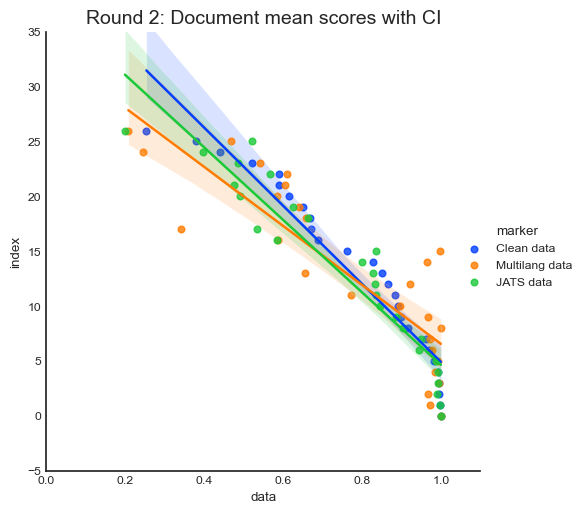

In [383]:
# this one has CI around the lines and no ytick labels
import seaborn as sns
lmplot_df = pd.DataFrame(data=x)
lmplot_df['marker'] = "clean"
lmplot_df.rename(columns={'data_mean':'data','marker':'marker'}, inplace=True)

multilang_df = pd.DataFrame(data = x2)
multilang_df['marker'] = "multilang"
multilang_df.rename(columns={'multi_lang_mean':'data','marker':'marker'}, inplace=True)
multilang_df

jats_df = pd.DataFrame(data=x3)
jats_df['marker'] = 'jats'
jats_df.rename(columns={'jats_mean':'data','marker':'marker'}, inplace=True)
jats_df

lmplot_df = pd.concat([lmplot_df,multilang_df], axis=0)
lmplot_df = pd.concat([lmplot_df,jats_df], axis=0)
lmplot_df['index']=lmplot_df.index

plt.figure(figsize=(7,7), dpi=250)
plt.style.use('seaborn-v0_8-white') # Or 'ggplot', 'fivethirtyeight', etc.

sns.color_palette("bright")
sns.set_style("white")
g = sns.lmplot(x="data",
            y="index",
            hue='marker',
            data=lmplot_df,
            order=1,
            palette="bright",
            ci=95,
            legend=True)
ax = plt.gca()
sns.set(context="paper")

ax.set_title("Round 2: Document mean scores with CI",fontdict={'size':14},loc='center')

#replace legend
new_legend = ['Clean data', 'Multilang data', 'JATS data']
for t, l in zip(g._legend.texts, new_legend):
    t.set_text(l)

plt.xlim(0, 1.1) # for scaled versions
plt.ylim(-5,35)

plt.show(g)



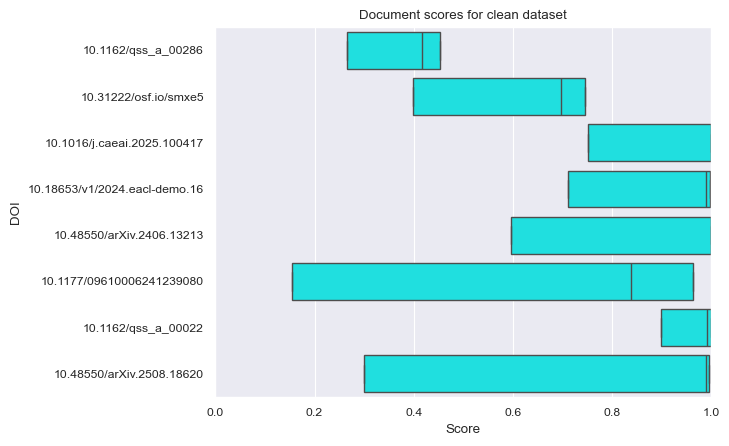

In [370]:
# count of DOIs - how is this different than golden set
data_documents_score_count = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI']).count())
data_documents_score_count = data_documents_score_count.sort_values('Score',ascending=False)

#save out
#data_documents_score_count.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_documents_score_count.xlsx")

data_documents_score_count

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# **********  SET THE FILTER TO AN APPROPRIATE AMOUNT *************
data_documents_score_count_top = data_documents_score_count[data_documents_score_count['Score']>=15]
data_documents_score_count_top.reset_index(inplace=True,drop=False)
data_documents_score_count_top_merged = data_documents_score_count_top.merge(data_documents_exploded, on='DOI', how='left')
data_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_documents_score_count_top_merged['Score'],
            y=data_documents_score_count_top_merged['DOI'],
            data=data_documents_score_count_top_merged,
            color='cyan',).set(title='Document scores for clean dataset')
plt.xlim(0, 1) # for scaled versions

plt.show()

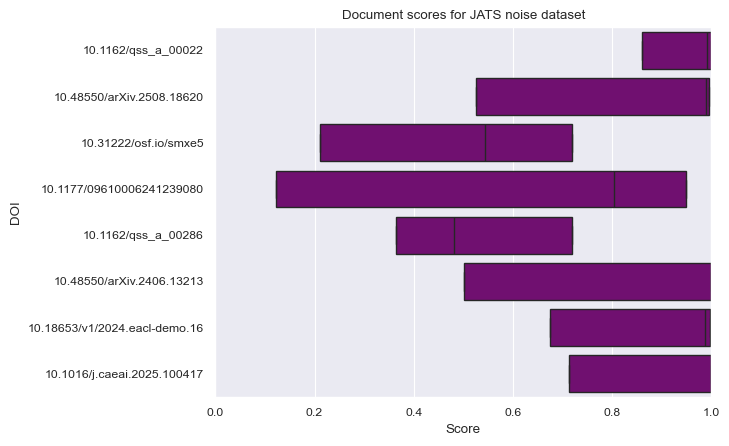

In [371]:
# let's do the same for JATS-tagged dataset
#data_jats_documents_exploded
# count of DOIs - how is this different than golden set
data_jats_documents_score_count = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI']).count())
data_jats_documents_score_count = data_jats_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# ************* SET THE FILTER LIMIT ************
data_jats_documents_score_count_top = data_jats_documents_score_count[data_jats_documents_score_count['Score']>=15]
data_jats_documents_score_count_top.reset_index(inplace=True,drop=False)
data_jats_documents_score_count_top_merged = data_jats_documents_score_count_top.merge(data_jats_documents_exploded, on='DOI', how='left')
data_jats_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_jats_documents_score_count_top_merged['Score'],
            y=data_jats_documents_score_count_top_merged['DOI'],
            data=data_jats_documents_score_count_top_merged,
            color='purple',).set(title="Document scores for JATS noise dataset")
plt.xlim(0, 1) # for scaled versions
plt.show()

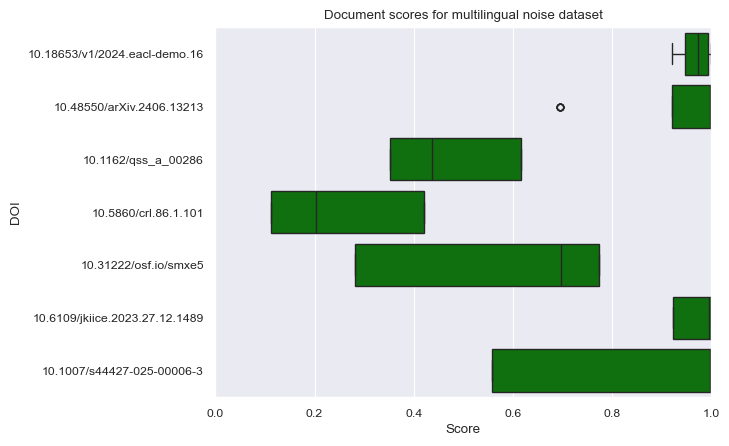

In [372]:
# let's do the same for multilingual dataset
#data_multi_lang_documents_exploded
# count of DOIs - how is this different than golden set
data_multi_lang_documents_score_count = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI']).count())
data_multi_lang_documents_score_count = data_multi_lang_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# *********** SET THE FILTER LIMIT **********
data_multi_lang_documents_score_count_top = data_multi_lang_documents_score_count[data_multi_lang_documents_score_count['Score']>=15]
data_multi_lang_documents_score_count_top.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_count_top_merged = data_multi_lang_documents_score_count_top.merge(data_multi_lang_documents_exploded, on='DOI', how='left')
data_multi_lang_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_multi_lang_documents_score_count_top_merged['Score'],
            y=data_multi_lang_documents_score_count_top_merged['DOI'],
            data=data_multi_lang_documents_score_count_top_merged,
            color='green',).set(title="Document scores for multilingual noise dataset")

plt.xlim(0, 1) # for scaled versions
plt.show()

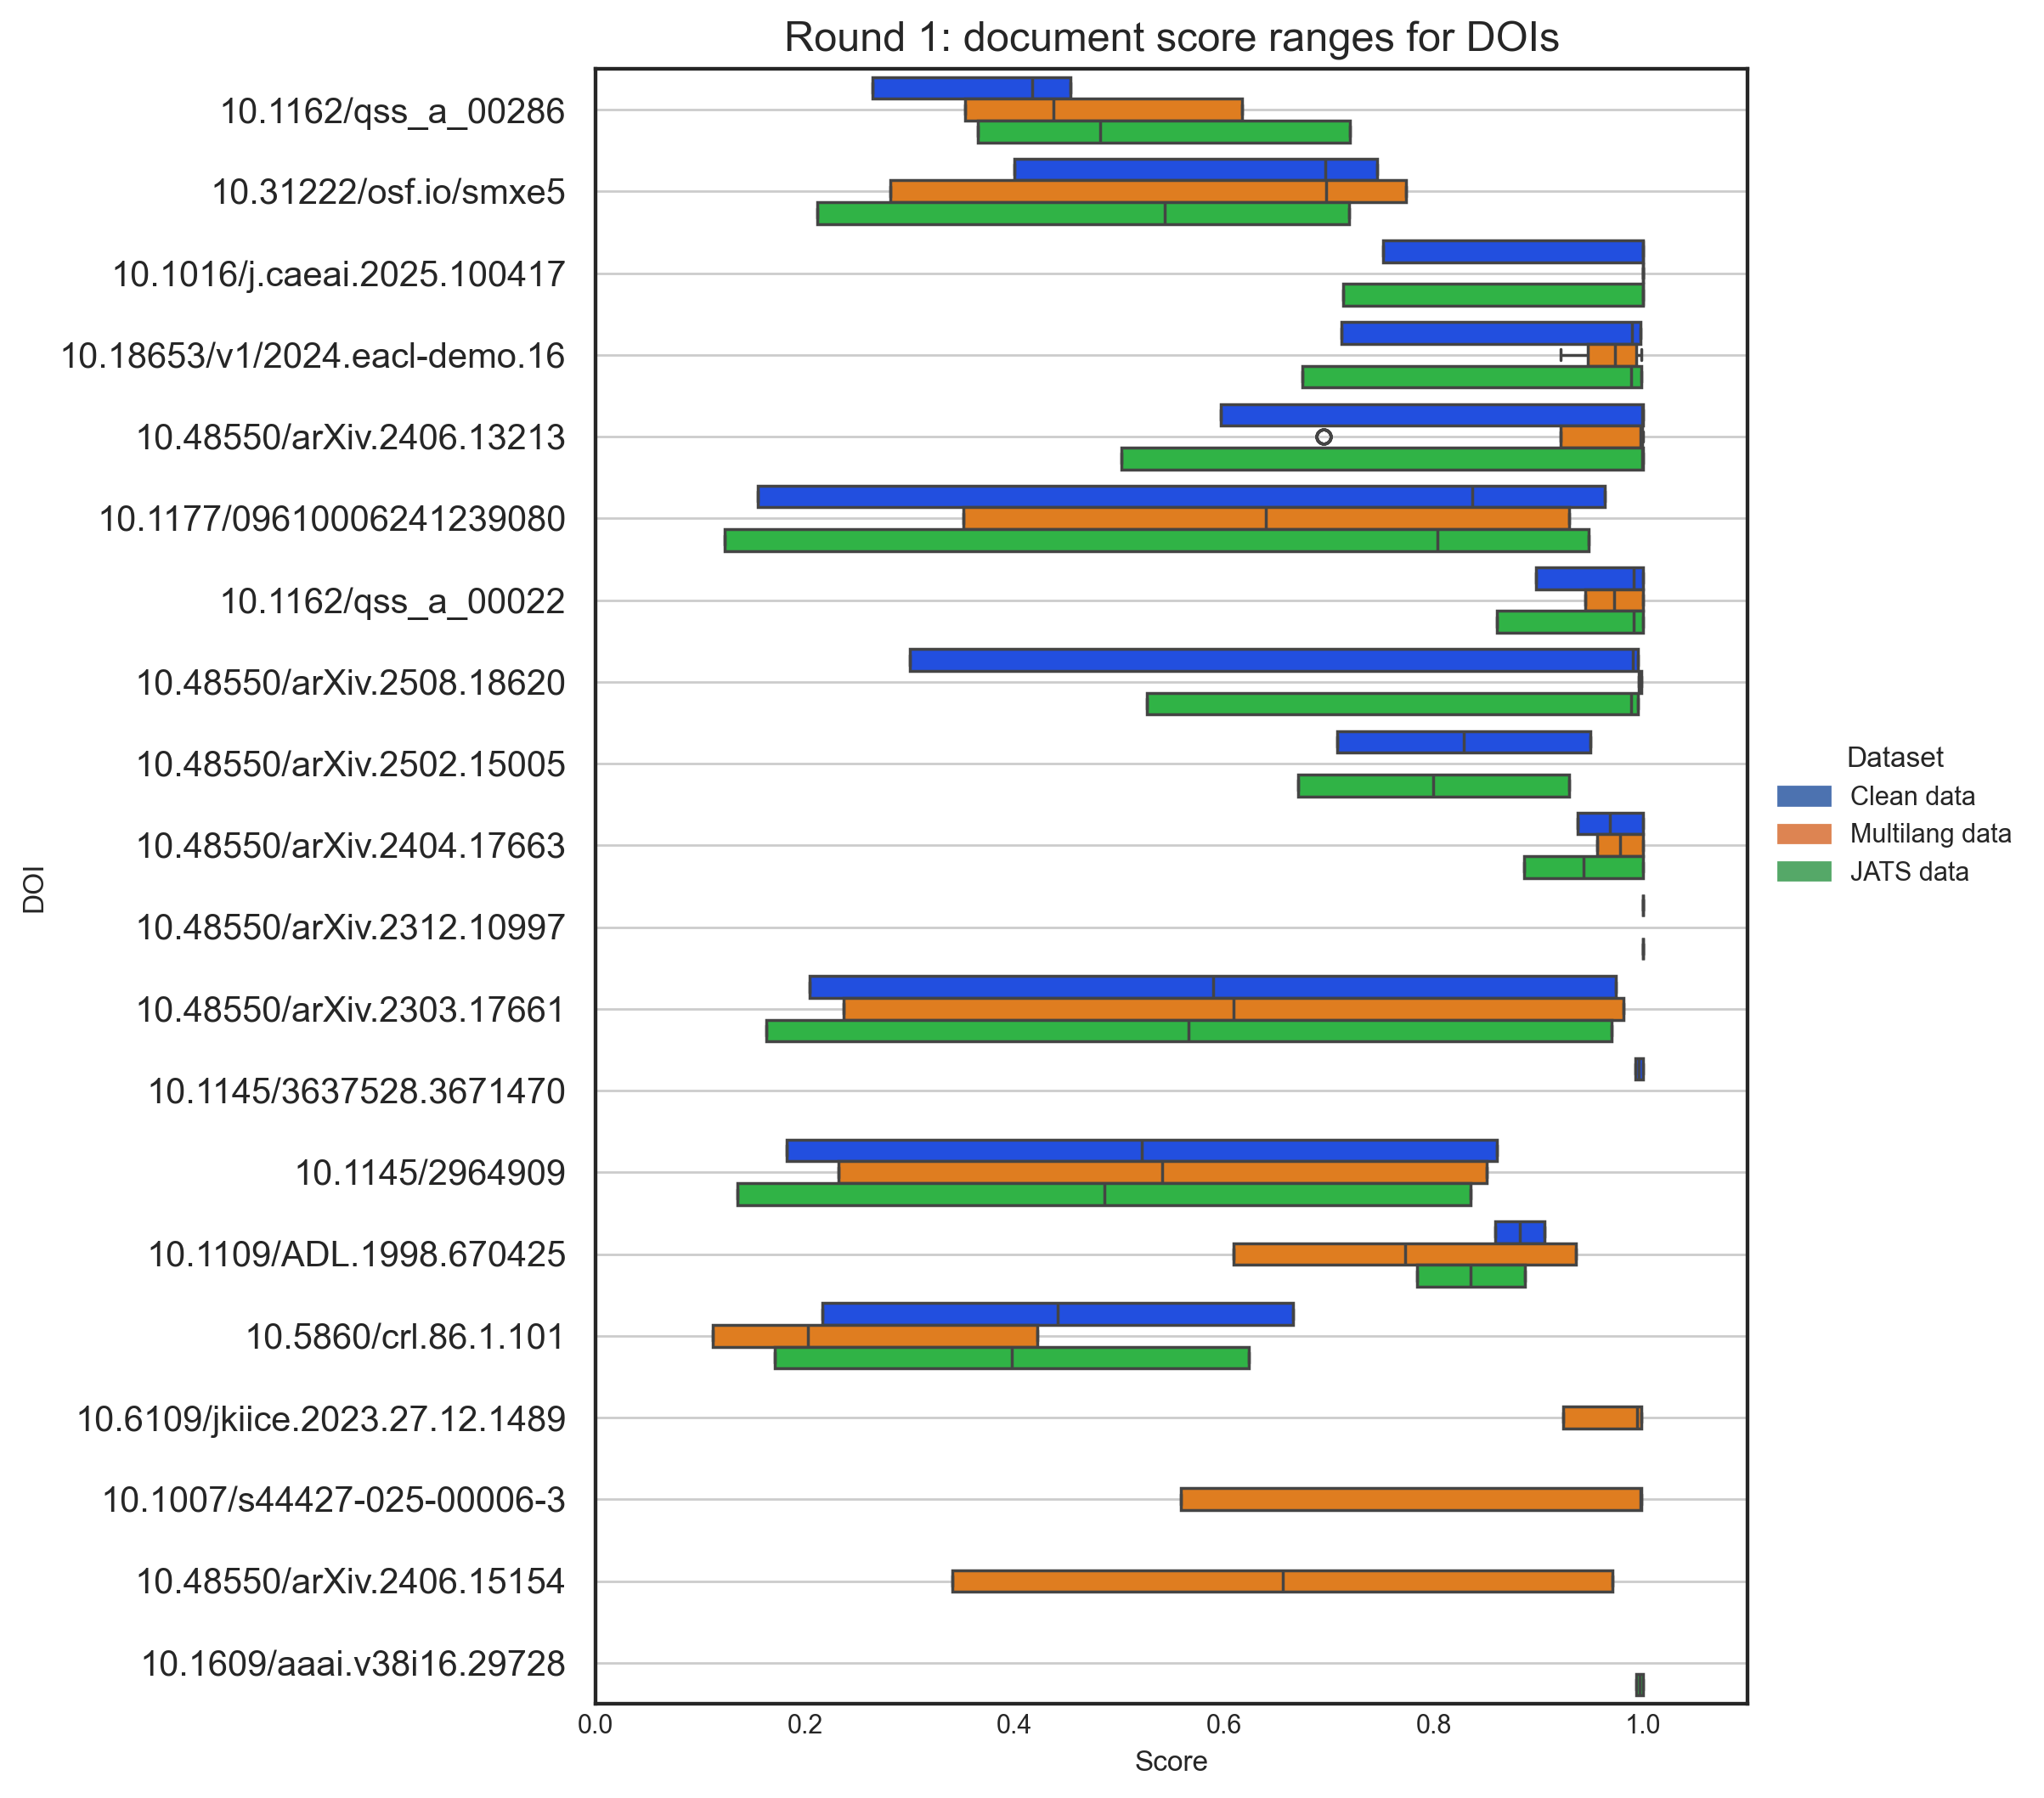

In [373]:
from matplotlib.patches import Patch

# let's try both in one plot
data_documents_score_count_top = data_documents_score_count[data_documents_score_count['Score']>=10]
data_documents_score_count_top.reset_index(inplace=True,drop=False)
data_documents_score_count_top_merged = data_documents_score_count_top.merge(data_documents_exploded, on='DOI', how='left')
data_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)


# the multilang data
data_multi_lang_documents_score_count_top = data_multi_lang_documents_score_count[data_multi_lang_documents_score_count['Score']>=10]
data_multi_lang_documents_score_count_top.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_count_top_merged = data_multi_lang_documents_score_count_top.merge(data_multi_lang_documents_exploded, on='DOI', how='left')
data_multi_lang_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

# ************* SET THE FILTER LIMIT ************
data_jats_documents_score_count_top = data_jats_documents_score_count[data_jats_documents_score_count['Score']>=10]
data_jats_documents_score_count_top.reset_index(inplace=True,drop=False)
data_jats_documents_score_count_top_merged = data_jats_documents_score_count_top.merge(data_jats_documents_exploded, on='DOI', how='left')
data_jats_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

#create new column in each with the dataset name
data_multi_lang_documents_score_count_top_merged['dataset'] = "multilang"
data_documents_score_count_top_merged['dataset'] = "clean"
data_jats_documents_score_count_top_merged['dataset'] = 'jats'
y = data_multi_lang_documents_score_count_top_merged[['DOI','Count','Score','dataset']]
x = data_documents_score_count_top_merged[['DOI','Count','Score','dataset']]
z = data_jats_documents_score_count_top_merged[['DOI','Count','Score','dataset']]

boxplot_df = pd.concat([x,y],join='inner',ignore_index=True)
boxplot_df = pd.concat([boxplot_df,z],join='inner',ignore_index=True)
boxplot_df


plt.figure(figsize=(7,10), dpi=250)
plt.style.use('seaborn-v0_8-white') # Or 'ggplot', 'fivethirtyeight', etc.

sns.boxplot(x=boxplot_df['Score'],
            y=boxplot_df['DOI'],
            data=boxplot_df,
            hue='dataset',
            legend=True,
            palette='bright')
ax=plt.gca()
plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1,1))
ax.tick_params(axis='y', pad=10, labelsize=12)  # Adjust the pad value as needed
sns.set(context="paper")
sns.set_style("white")
plt.grid(visible=True,axis='y')
plt.xlim(0, 1.1) # for scaled versions

#replace legend

handles = [
    Patch(color=sns.color_palette()[0], label='Clean data'),
    Patch(color=sns.color_palette()[1], label='Multilang data'),
    Patch(color=sns.color_palette()[2], label='JATS data')
]
plt.legend(title='Dataset', handles=handles, bbox_to_anchor=(1.25,0.6))

ax.set_title("Round 1: document score ranges for DOIs",fontdict={'size':14},loc='center')

plt.show()

# Response analysis


In [374]:
# read in data
data_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/results/english_clean_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_jats_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/results/english_jats_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_multi_lang_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round2/results/english_multi_lang_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
print(f"Len multi_lang: {len(data_multi_lang_response)}")
print(f"Len jats: {len(data_jats_response)}")
print(f"Len data: {len(data_response)}")



Len multi_lang: 80
Len jats: 80
Len data: 80


In [375]:
data_response_grouped = pd.DataFrame(data_response.groupby(data_response['Query'])['Answer relevance'].agg('mean'))
data_response_grouped.reset_index(inplace=True,drop=False)
data_response_grouped

data_jats_response_grouped = pd.DataFrame(data_jats_response.groupby(data_jats_response['Query'])['Answer relevance'].agg('mean'))
data_jats_response_grouped.reset_index(inplace=True,drop=False)
data_jats_response_grouped

data_multi_lang_response_grouped = pd.DataFrame(data_multi_lang_response.groupby(data_multi_lang_response['Query'])['Answer relevance'].agg('mean'))
data_multi_lang_response_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_response_grouped

response_grouped_together = data_response_grouped.merge(data_jats_response_grouped,on='Query')
response_grouped_together = response_grouped_together.merge(data_multi_lang_response_grouped,on='Query')
response_grouped_together.rename(inplace=True,columns={'Query':'Query',
                                                        'Answer relevance_x':'Relevance_data',
                                                        'Answer relevance_y':'Relevance_jats',
                                                        'Answer relevance':'Relevance_multi_lang'})
#save out
file_name = "response_grouped_together.xlsx"
save_location = f"{file_folder}{file_name}"
response_grouped_together.to_excel(save_location)

#ANOVA TEST
stat = f_oneway(response_grouped_together['Relevance_data'],response_grouped_together['Relevance_jats'],response_grouped_together['Relevance_multi_lang'])
print(f"Pvalue: {stat.pvalue}\nFvalue: {stat.statistic}")
if stat.pvalue >= 0.05:
    print(Fore.RED + 'the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet'+Style.RESET_ALL)
else:
    print(Fore.LIGHTGREEN_EX + "reject the null! the groups are statistically different. See the Dunnet results"+ Style.RESET_ALL)

# DUNNET CORRECTION TEST - ONLY PERFORM IF THE ANOVA IS STATISTICALLY SIGNIFICANT, BELOW 0.05
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dunnett.html
groups = [response_grouped_together['Relevance_jats'].to_list(),response_grouped_together['Relevance_multi_lang'].to_list()]
control = response_grouped_together['Relevance_data'].to_list()
#dunnet_result = scikit_posthocs.posthoc_dunnett(groups,)
dunnet_result = dunnett(*groups,control=control)
print(f"Dunnet: {dunnet_result}")

response_grouped_together

Pvalue: 0.7316631625056436
Fvalue: 0.3146143437077132
the groups are not dissimilar (reject the null hypothesis) - Ignore the Dunnet
Dunnet: Dunnett's test (95.0% Confidence Interval)
Comparison               Statistic  p-value  Lower CI  Upper CI
 (Sample 0 - Control)     -0.123     0.989    -0.244     0.219
 (Sample 1 - Control)     -0.740     0.681    -0.306     0.156



,Query,Relevance_data,Relevance_jats,Relevance_multi_lang
0,['How is RAG used to improve question answerin...,1.0,1.0,1.0
1,['Tell me about Crossref.'],1.0,1.0,1.0
2,['What are the key challenges and advancements...,1.0,1.0,1.0
3,['What are the key challenges and advancements...,1.0,1.0,1.0
4,['What are the key challenges and potential so...,0.6,0.4,0.6
5,['What are the key features and limitations of...,1.0,1.0,0.8
6,['What are the main challenges in normalizing ...,0.0,0.0,0.0
7,['What are the strengths and weaknesses of Web...,1.0,1.0,0.8
8,['What is Crossref’s role in the scholarly res...,1.0,1.0,1.0
9,['What methods are used to detect and correct ...,1.0,1.0,1.0


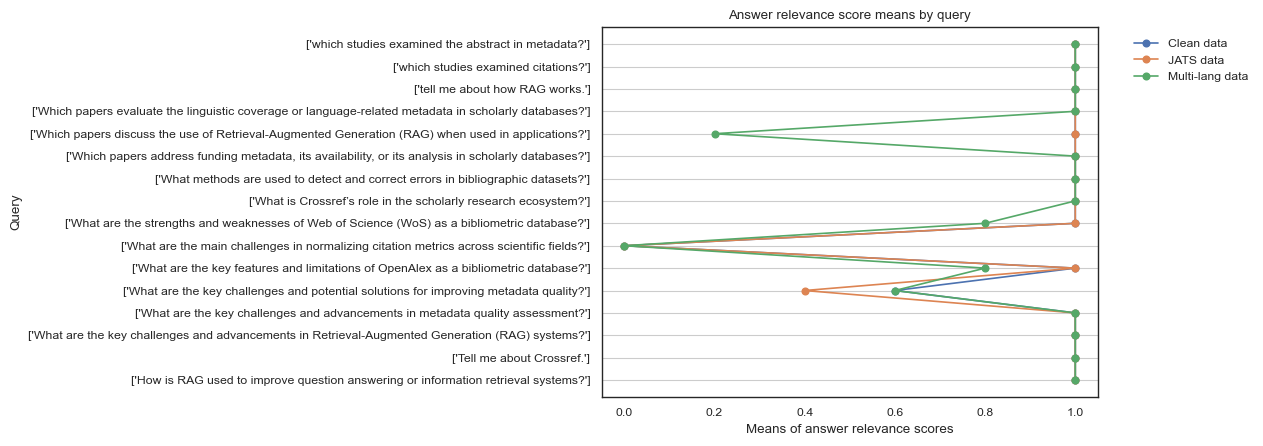

In [376]:
import matplotlib.pyplot as plt
# let's see a plot of these values
fig,ax = plt.subplots()
plt.plot(response_grouped_together[['Relevance_data','Relevance_jats','Relevance_multi_lang']],
        response_grouped_together['Query'],
        marker='o',
        linestyle='-',data=response_grouped_together)
plt.xlabel('Means of answer relevance scores')
plt.ylabel('Query')
plt.title("Answer relevance score means by query")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='best', bbox_to_anchor=(1.05,1))
plt.grid(visible=True,axis='y')
plt.show()